In [ ]:
!pip install bert-score==0.3.13

In [4]:
import numpy as np
import pandas as pd
import pickle
import tqdm
from bert_score import BERTScorer

In [5]:
with open('./simplicityDA_silver.pickle', 'rb') as f:
    simplicityDA_silver = pickle.load(f)

In [9]:
simplicityDA_silver['group_id'] = range(len(simplicityDA_silver))

In [10]:
simplicityDA_silver

,sent_id,sys_name,orig_sent,simp_sent,sys_type,fluency,fluency_zscore,meaning,meaning_zscore,simplicity,simplicity_zscore,inter,group_id
0,268,ACCESS,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...,NeuralSeq2Seq,77.400000,0.152400,77.333333,0.530362,71.333333,0.611060,[Prunk is a member of Institute of European Hi...,0
1,67,SBMT-SARI,"In return, Rollo swore fealty to Charles, conv...","In return, Rollo swore fealty to Charles, conv...",SBMT,87.866667,0.512595,96.466667,1.142803,90.933333,1.257177,[In return Rollo swore fealty to Charles conve...,1
2,341,SBMT-SARI,From 1900 to 1920 many new facilities were con...,From 1900 to 1920 many new plants were built o...,SBMT,79.133333,0.119438,68.533333,0.284701,53.800000,0.158894,[From 1900 to 1920 many new plants were constr...,2
3,278,PBMT-R,Mercury is similar in appearance to the Moon: ...,Mercury is similar in appearance to the Moon: ...,PBMT,90.333333,0.598145,90.666667,0.965649,71.600000,0.664848,[Mercury is similar in appearance to the Moon ...,3
4,107,Hybrid,"He settled in London, devoting himself chiefly...","He settled in London, devoting himself.",Semantics+PBMT,65.466667,-0.425792,32.066667,-0.820035,27.733333,-0.577387,[],4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,210,Hybrid,Orchestration Stravinsky first conceived of wr...,Orchestration Stravinsky conceived of writing ...,Semantics+PBMT,68.333333,-0.092967,89.933333,0.846412,63.400000,0.336182,[],595
596,202,Dress-Ls,"The album, however, was banned from many recor...",The album was banned from many record stores n...,NeuralSeq2Seq,99.600000,0.970276,95.333333,1.027604,81.800000,0.890318,[],596
597,194,PBMT-R,ISBN 1-876429-14-3 is an historic township loc...,Gunnedah is a historic town near Cowra in the ...,PBMT,73.733333,0.040598,58.466667,-0.104838,73.800000,0.606212,[Gunnedah - a - town 3 is an historic township...,597
598,148,Dress-Ls,"Later, Esperanto speakers began to see the lan...",Esperanto speakers began to see the language a...,NeuralSeq2Seq,71.533333,-0.001330,71.000000,0.274918,74.133333,0.614088,[Esperanto speakers began to see the language ...,598


In [25]:
simplicityDA_silver['sys_name'].unique()

array(['ACCESS', 'SBMT-SARI', 'PBMT-R', 'Hybrid', 'DMASS-DCSS',
       'Dress-Ls'], dtype=object)

In [30]:
simplicityDA_silver[simplicityDA_silver['sys_name'] == 'Hybrid'].index

Int64Index([  4,  18,  24,  26,  39,  49,  52,  55,  63,  72,  74,  75,  78,
             84,  89,  90, 100, 101, 113, 118, 123, 124, 126, 134, 143, 149,
            151, 158, 160, 174, 180, 185, 199, 201, 208, 213, 225, 226, 229,
            230, 231, 246, 247, 252, 254, 256, 258, 265, 269, 279, 280, 286,
            289, 290, 296, 300, 308, 310, 314, 341, 342, 343, 357, 360, 361,
            367, 374, 385, 387, 389, 400, 419, 421, 424, 427, 428, 442, 447,
            453, 454, 461, 472, 482, 488, 490, 493, 498, 508, 509, 516, 517,
            528, 529, 532, 534, 535, 554, 568, 595, 599],
           dtype='int64')

In [36]:
random.sample(list(simplicityDA_silver[simplicityDA_silver['sys_name'] == 'Hybrid'].index), 10)

[554, 52, 63, 49, 269, 427, 101, 118, 113, 387]

In [37]:
import random
def random_sample_by_system(df, seed):
    random.seed(seed)
    sampled_index = []
    sys_ls = list(df['sys_name'].unique())
    for i in range(len(sys_ls)):
        sys_name = sys_ls[i]
        extracted_df_by_sys_name = df[df['sys_name'] == sys_name].copy()
        sampled_index.extend(random.sample(list(extracted_df_by_sys_name.index), 80))
    return sampled_index

In [68]:
ind = random_sample_by_system(simplicityDA_silver, 1)

In [70]:
simplicityDA_silver[simplicityDA_silver.index.isin(ind)]['sys_name'].value_counts()

ACCESS        80
SBMT-SARI     80
PBMT-R        80
DMASS-DCSS    80
Dress-Ls      80
Hybrid        80
Name: sys_name, dtype: int64

In [54]:
simplicityDA_silver[~simplicityDA_silver.index.isin(ind)]['sys_name'].value_counts()

Hybrid        20
DMASS-DCSS    20
ACCESS        20
SBMT-SARI     20
PBMT-R        20
Dress-Ls      20
Name: sys_name, dtype: int64

In [74]:
import pickle
seed = 1
ind = random_sample_by_system(simplicityDA_silver, seed)
with open('./simplicityDA_silver_train.pickle', 'wb') as f:
    pickle.dump(simplicityDA_silver[simplicityDA_silver.index.isin(ind)], f)
with open('./simplicityDA_silver_test.pickle', 'wb') as f:
    pickle.dump(simplicityDA_silver[~simplicityDA_silver.index.isin(ind)], f)

In [75]:
with open('./simplicityDA_silver_train.pickle', 'rb') as f:
    simplicityDA_silver = pickle.load(f)

In [76]:
simplicityDA_silver['sys_name'].value_counts()

ACCESS        80
SBMT-SARI     80
PBMT-R        80
DMASS-DCSS    80
Dress-Ls      80
Hybrid        80
Name: sys_name, dtype: int64

In [117]:
simplicityDA_silver

,sent_id,sys_name,orig_sent,simp_sent,sys_type,fluency,fluency_zscore,meaning,meaning_zscore,simplicity,simplicity_zscore,inter,group_id
0,268,ACCESS,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...,NeuralSeq2Seq,77.400000,0.152400,77.333333,0.530362,71.333333,0.611060,[Prunk is a member of Institute of European Hi...,0
1,67,SBMT-SARI,"In return, Rollo swore fealty to Charles, conv...","In return, Rollo swore fealty to Charles, conv...",SBMT,87.866667,0.512595,96.466667,1.142803,90.933333,1.257177,[In return Rollo swore fealty to Charles conve...,1
2,341,SBMT-SARI,From 1900 to 1920 many new facilities were con...,From 1900 to 1920 many new plants were built o...,SBMT,79.133333,0.119438,68.533333,0.284701,53.800000,0.158894,[From 1900 to 1920 many new plants were constr...,2
3,278,PBMT-R,Mercury is similar in appearance to the Moon: ...,Mercury is similar in appearance to the Moon: ...,PBMT,90.333333,0.598145,90.666667,0.965649,71.600000,0.664848,[Mercury is similar in appearance to the Moon ...,3
5,208,DMASS-DCSS,The plant is considered a living fossil.,The plant is thought to be a living fossil.,NeuralSeq2Seq,89.666667,0.509301,96.400000,1.102373,66.600000,0.558290,[],5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,296,SBMT-SARI,Version 2009.1 provides a USB installer to cre...,Print 2009.1 offers a USB driver to create a L...,SBMT,69.333333,-0.022690,75.466667,0.274683,64.200000,0.374245,[Version 2009.1 offers a USB installer to crea...,594
595,210,Hybrid,Orchestration Stravinsky first conceived of wr...,Orchestration Stravinsky conceived of writing ...,Semantics+PBMT,68.333333,-0.092967,89.933333,0.846412,63.400000,0.336182,[],595
596,202,Dress-Ls,"The album, however, was banned from many recor...",The album was banned from many record stores n...,NeuralSeq2Seq,99.600000,0.970276,95.333333,1.027604,81.800000,0.890318,[],596
598,148,Dress-Ls,"Later, Esperanto speakers began to see the lan...",Esperanto speakers began to see the language a...,NeuralSeq2Seq,71.533333,-0.001330,71.000000,0.274918,74.133333,0.614088,[Esperanto speakers began to see the language ...,598


In [77]:
simplicityDA_silver['inter'].iloc[3]

['Mercury is similar in appearance to the Moon it is heavily cratered with regions of smooth plains has no moons and no substantial atmosphere .',
 'Mercury is similar in appearance to the Moon it is very cratered with regions of smooth plains has no natural satellites and no substantial atmosphere .']

In [260]:
silvers_list = []
simples = []
originals = []
silvers_group_ids = []
for i in tqdm.tqdm(range(len(simplicityDA_silver))):
    silver = simplicityDA_silver.iloc[i]['inter']
    group_id = simplicityDA_silver.iloc[i]['group_id']
    simple = simplicityDA_silver.iloc[i]['simp_sent']
    original = simplicityDA_silver.iloc[i]['orig_sent']
    for j in range(len(silver)):
        silvers_list.append(silver[j])
        simples.append(simple)
        originals.append(original)
        silvers_group_ids.append(group_id)
silvers_df = pd.DataFrame({'silver':silvers_list, 'group_id':silvers_group_ids, 'simple':simples, 'original':originals})

100%|██████████| 480/480 [00:00<00:00, 2651.56it/s]


In [261]:
silvers_df

,silver,group_id,simple,original
0,Prunk is a member of Institute of European His...,0,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...
1,Prunk is a member of Institute of European His...,0,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...
2,In return Rollo swore fealty to Charles conver...,1,"In return, Rollo swore fealty to Charles, conv...","In return, Rollo swore fealty to Charles, conv..."
3,In return Rollo swore fealty to Charles conver...,1,"In return, Rollo swore fealty to Charles, conv...","In return, Rollo swore fealty to Charles, conv..."
4,In return Rollo swore fealty to Charles conver...,1,"In return, Rollo swore fealty to Charles, conv...","In return, Rollo swore fealty to Charles, conv..."
...,...,...,...,...
5331,The New city York Housing Authority Police Dep...,599,The new city York Housing Authority Police Dep...,The New York City Housing Authority Police Dep...
5332,The New city York City Housing Authority Polic...,599,The new city York Housing Authority Police Dep...,The New York City Housing Authority Police Dep...
5333,The New city York Housing Authority Police Dep...,599,The new city York Housing Authority Police Dep...,The New York City Housing Authority Police Dep...
5334,The New York City Housing Authority Police Dep...,599,The new city York Housing Authority Police Dep...,The New York City Housing Authority Police Dep...


In [19]:
lowercase = False
tokenizer = "moses"
bertscore_rescale = BERTScorer(batch_size=128, nthreads=8, lang="en", rescale_with_baseline=True)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [262]:
scores_silver_simple = bertscore_rescale.score(silvers_df['silver'].tolist(), silvers_df['simple'].tolist())
scores_silver_original = bertscore_rescale.score(silvers_df['silver'].tolist(), silvers_df['original'].tolist())

In [263]:
silvers_df['BS_f1_silver_simple'] = scores_silver_simple[2]
silvers_df['BS_f1_silver_original'] = scores_silver_original[2]
silvers_df['BS_f1_mean'] = (scores_silver_simple[2] + scores_silver_original[2]) / 2

In [140]:
import matplotlib.pyplot as plt

In [141]:
silvers_df['BS_f1_mean'].mean()

0.60384387

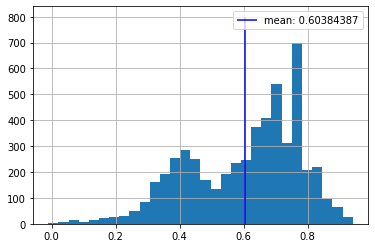

In [142]:
silvers_df['BS_f1_mean'].hist(bins=30)
plt.vlines(silvers_df['BS_f1_mean'].mean(), ymin=0, ymax=800, colors='blue', label='mean: '+str(silvers_df['BS_f1_mean'].mean()))
#plt.vlines(silvers_df['BS_f1_mean'].median(), ymin=0, ymax=22500, colors='lightblue', label='median: '+str(silvers_df['BS_f1_mean'].median()))
#golds_df['BS_f1_mean'].hist(bins=30)
#plt.vlines(golds_df['BS_f1_mean'].mean(), ymin=0, ymax=22500, colors='red', label='mean: ' + str(golds_df['BS_f1_mean'].mean()))
#plt.vlines(golds_df['BS_f1_mean'].median(), ymin=0, ymax=22500, colors='orange', label='median: '+str(golds_df['BS_f1_mean'].median()))
plt.legend()
plt.show()

In [85]:
len(silvers_df[silvers_df['BS_f1_mean'] > silvers_df['BS_f1_mean'].mean()]) / len(silvers_df['BS_f1_mean'])

0.5837706146926537

In [86]:
silvers_df[silvers_df['BS_f1_mean'] > silvers_df['BS_f1_mean'].mean()]

,silver,group_id,simple,original,BS_f1_silver_simple,BS_f1_silver_original,BS_f1_mean
0,Prunk is a member of Institute of European His...,0,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...,0.854821,0.859797,0.857309
1,Prunk is a member of Institute of European His...,0,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...,0.828446,0.828877,0.828662
2,In return Rollo swore fealty to Charles conver...,1,"In return, Rollo swore fealty to Charles, conv...","In return, Rollo swore fealty to Charles, conv...",0.803394,0.835474,0.819434
3,In return Rollo swore fealty to Charles conver...,1,"In return, Rollo swore fealty to Charles, conv...","In return, Rollo swore fealty to Charles, conv...",0.786110,0.848399,0.817255
4,In return Rollo swore fealty to Charles conver...,1,"In return, Rollo swore fealty to Charles, conv...","In return, Rollo swore fealty to Charles, conv...",0.851435,0.805944,0.828690
...,...,...,...,...,...,...,...
5331,The New city York Housing Authority Police Dep...,599,The new city York Housing Authority Police Dep...,The New York City Housing Authority Police Dep...,0.491101,0.881225,0.686163
5332,The New city York City Housing Authority Polic...,599,The new city York Housing Authority Police Dep...,The New York City Housing Authority Police Dep...,0.635437,0.723461,0.679449
5333,The New city York Housing Authority Police Dep...,599,The new city York Housing Authority Police Dep...,The New York City Housing Authority Police Dep...,0.650823,0.727585,0.689204
5334,The New York City Housing Authority Police Dep...,599,The new city York Housing Authority Police Dep...,The New York City Housing Authority Police Dep...,0.764633,0.646793,0.705713


In [264]:
filtered_df_silver = silvers_df[silvers_df['BS_f1_mean'] > silvers_df['BS_f1_mean'].mean()].copy()
#filtered_df_silver = pd.concat([filtered_df_silver, silvers_df_simpsimp])
filtered_dict = {} #key:val = group_id:filtered_list
simples = []
originals = []

#group_idごとにsilverをまとめる
for i in tqdm.tqdm(range(len(filtered_df_silver))):
    fs = filtered_df_silver.iloc[i]['silver']
    group_id = filtered_df_silver.iloc[i]['group_id']
    filtered_list = []
    if group_id not in filtered_dict:
        filtered_dict[group_id] = [fs]
    else:
        filtered_dict[group_id].append(fs)

group_ids = []
filtered_silver = []
for i in simplicityDA_silver['group_id'].unique():
    group_ids.append(i)
    if i in filtered_dict:
        filtered_silver.append(filtered_dict[i])
    else:
        filtered_silver.append([])
fdata_silver = pd.DataFrame({'group_id':group_ids, 'inter':filtered_silver})
fs_df_all =  simplicityDA_silver.drop(columns=['inter']).merge(fdata_silver, on=['group_id'])

100%|██████████| 3115/3115 [00:00<00:00, 5592.94it/s]


In [265]:
fs_df_all.rename(columns={'orig_sent':'original', 'simp_sent':'simple'}, inplace=True)

In [266]:
fs_df_all

,sent_id,sys_name,original,simple,sys_type,fluency,fluency_zscore,meaning,meaning_zscore,simplicity,simplicity_zscore,group_id,inter
0,268,ACCESS,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...,NeuralSeq2Seq,77.400000,0.152400,77.333333,0.530362,71.333333,0.611060,0,[Prunk is a member of Institute of European Hi...
1,67,SBMT-SARI,"In return, Rollo swore fealty to Charles, conv...","In return, Rollo swore fealty to Charles, conv...",SBMT,87.866667,0.512595,96.466667,1.142803,90.933333,1.257177,1,[In return Rollo swore fealty to Charles conve...
2,341,SBMT-SARI,From 1900 to 1920 many new facilities were con...,From 1900 to 1920 many new plants were built o...,SBMT,79.133333,0.119438,68.533333,0.284701,53.800000,0.158894,2,[From 1900 to 1920 many new plants were constr...
3,278,PBMT-R,Mercury is similar in appearance to the Moon: ...,Mercury is similar in appearance to the Moon: ...,PBMT,90.333333,0.598145,90.666667,0.965649,71.600000,0.664848,3,[Mercury is similar in appearance to the Moon ...
4,208,DMASS-DCSS,The plant is considered a living fossil.,The plant is thought to be a living fossil.,NeuralSeq2Seq,89.666667,0.509301,96.400000,1.102373,66.600000,0.558290,5,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,296,SBMT-SARI,Version 2009.1 provides a USB installer to cre...,Print 2009.1 offers a USB driver to create a L...,SBMT,69.333333,-0.022690,75.466667,0.274683,64.200000,0.374245,594,[Version 2009.1 offers a USB installer to crea...
476,210,Hybrid,Orchestration Stravinsky first conceived of wr...,Orchestration Stravinsky conceived of writing ...,Semantics+PBMT,68.333333,-0.092967,89.933333,0.846412,63.400000,0.336182,595,[]
477,202,Dress-Ls,"The album, however, was banned from many recor...",The album was banned from many record stores n...,NeuralSeq2Seq,99.600000,0.970276,95.333333,1.027604,81.800000,0.890318,596,[]
478,148,Dress-Ls,"Later, Esperanto speakers began to see the lan...",Esperanto speakers began to see the language a...,NeuralSeq2Seq,71.533333,-0.001330,71.000000,0.274918,74.133333,0.614088,598,[Esperanto speakers began to see the language ...


In [295]:
import random
import tqdm
def make_nprm_v11_trainable(data, mode, m=1, m_seed=1, is_flip=True):
    simpz_mean = simplicityDA_silver['simplicity_zscore'].mean()
    group_id_tmp = 600
    if mode == 'woaug':
        random.seed(m_seed)
        orig = []
        simp = []
        label = []
        group_ids = []
        for i in tqdm.tqdm(range(len(data))):
            simple = data.iloc[i]["simple"]
            original = data.iloc[i]["original"]
            group_id = data.iloc[i]["group_id"]
            if is_flip == False:
                orig.append(original), simp.append(simple), label.append(1), group_ids.append(group_id)
                orig.append(simple), simp.append(original), label.append(0), group_ids.append(group_id)
            else:
                if simpz_mean < data.iloc[i]["simplicity_zscore"]:
                    orig.append(original), simp.append(simple), label.append(1), group_ids.append(group_id)
                    orig.append(simple), simp.append(original), label.append(0), group_ids.append(group_id)
                else:
                    orig.append(original), simp.append(simple), label.append(0), group_ids.append(group_id)
                    orig.append(simple), simp.append(original), label.append(1), group_ids.append(group_id)
                    
        for sent_id, val in fs_df_all.groupby('sent_id'):
            for i in range(len(val)):
                for j in range(i, len(val)):
                    if i != j:
                        if val.iloc[i]['simplicity_zscore'] > val.iloc[j]['simplicity_zscore']:
                            orig.append(val.iloc[i]['simple']), simp.append(val.iloc[j]['simple']), label.append(0), group_ids.append(group_id_tmp)
                            orig.append(val.iloc[j]['simple']), simp.append(val.iloc[i]['simple']), label.append(1), group_ids.append(group_id_tmp)
                            group_id_tmp += 1
                        else:
                            orig.append(val.iloc[i]['simple']), simp.append(val.iloc[j]['simple']), label.append(1), group_ids.append(group_id_tmp)
                            orig.append(val.iloc[j]['simple']), simp.append(val.iloc[i]['simple']), label.append(0), group_ids.append(group_id_tmp)
                            group_id_tmp += 1
        return pd.DataFrame(data={"orig":orig, "simp":simp, "label":label, "group_id":group_ids})  
    
    if mode == 'aug':
        random.seed(m_seed)
        orig = []
        simp = []
        label = []
        group_ids = []
        is_include_inter = []
        for i in tqdm.tqdm(range(len(data))):
            simple = data.iloc[i]["simple"]
            original = data.iloc[i]["original"]
            group_id = data.iloc[i]["group_id"]
            if is_flip == False:
                orig.append(original), simp.append(simple), label.append(1), group_ids.append(group_id)
                orig.append(simple), simp.append(original), label.append(0), group_ids.append(group_id)
            else:
                if simpz_mean < data.iloc[i]["simplicity_zscore"]:
                    orig.append(original), simp.append(simple), label.append(1), group_ids.append(group_id)
                    orig.append(simple), simp.append(original), label.append(0), group_ids.append(group_id)
                else:
                    orig.append(original), simp.append(simple), label.append(0), group_ids.append(group_id)
                    orig.append(simple), simp.append(original), label.append(1), group_ids.append(group_id)
            inters = data.iloc[i]["inter"]
            if inters != -1:
                inters_to_select = random.sample(inters, min(m, len(inters)))
                if simpz_mean < data.iloc[i]["simplicity_zscore"]:
                    for inter in inters_to_select:
                            orig.append(original), simp.append(inter), label.append(1), group_ids.append(group_id)
                            orig.append(inter), simp.append(original), label.append(0), group_ids.append(group_id)
                            orig.append(inter), simp.append(simple), label.append(1), group_ids.append(group_id)
                            orig.append(simple), simp.append(inter), label.append(0), group_ids.append(group_id)
                else:
                    for inter in inters_to_select:
                            orig.append(original), simp.append(inter), label.append(0), group_ids.append(group_id)
                            orig.append(inter), simp.append(original), label.append(1), group_ids.append(group_id)
                            orig.append(inter), simp.append(simple), label.append(0), group_ids.append(group_id)
                            orig.append(simple), simp.append(inter), label.append(1), group_ids.append(group_id)
        for sent_id, val in fs_df_all.groupby('sent_id'):
            for i in range(len(val)):
                for j in range(i, len(val)):
                    if i != j:
                        if val.iloc[i]['simplicity_zscore'] > val.iloc[j]['simplicity_zscore']:
                            orig.append(val.iloc[i]['simple']), simp.append(val.iloc[j]['simple']), label.append(0), group_ids.append(group_id_tmp)
                            orig.append(val.iloc[j]['simple']), simp.append(val.iloc[i]['simple']), label.append(1), group_ids.append(group_id_tmp)
                            group_id_tmp += 1
                        else:
                            orig.append(val.iloc[i]['simple']), simp.append(val.iloc[j]['simple']), label.append(1), group_ids.append(group_id_tmp)
                            orig.append(val.iloc[j]['simple']), simp.append(val.iloc[i]['simple']), label.append(0), group_ids.append(group_id_tmp)
                            group_id_tmp += 1
        return pd.DataFrame(data={"orig":orig, "simp":simp, "label":label, "group_id":group_ids})  

In [296]:
a = make_nprm_v11_trainable(fs_df_all, mode="aug", m=1, m_seed=1)
print(len(a))

100%|██████████| 480/480 [00:00<00:00, 1794.15it/s]


2678


In [297]:
a

,orig,simp,label,group_id
0,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...,1,0
1,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...,0,0
2,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...,1,0
3,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...,0,0
4,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...,1,0
...,...,...,...,...
2673,Gable earned an Academy Award nomination he po...,Gable also received an Academy Award nominatio...,1,886
2674,Gable also received an Academy Award nominatio...,He also earned an Academy Award nomination whe...,0,887
2675,He also earned an Academy Award nomination whe...,Gable also received an Academy Award nominatio...,1,887
2676,Gable earned an Academy Award nomination he po...,He also earned an Academy Award nomination whe...,1,888


In [285]:
a.iloc[3]['orig']

'Prunk is a member of Institute of European History in Mainz and a member of the Center for European Integration Studies in Bonn .'

In [289]:
a.iloc[3]['simp']

'Prunk is a member of Institute of European History in Mainz, and a senior fellow of the Center for European Integration Studies in Bonn.'

In [286]:
b = make_nprm_v11_trainable(fs_df_all, mode="woaug", m=1, m_seed=1)
print(len(b))

100%|██████████| 480/480 [00:00<00:00, 2704.50it/s]


1538


In [287]:
b[:5].iloc[0]['orig']

'Prunk is a member of Institute of European History in Mainz, and a senior fellow of the Center for European Integration Studies in Bonn.'

In [288]:
b[:5].iloc[0]['simp']

'Prunk is a member of Institute of European History in Mainz. He was also a member of the Center for European Integration Studies in Bonn.'

In [298]:
## exp2 (sliver)
for m_seed in range(1, 11):
    with open(f'./v11_simplicityDA_trial2/simplicityDA_nprm_v11_silver_filtered_trial2_m1aug{m_seed}_100.pickle', 'wb') as f:
        pickle.dump(make_nprm_v11_trainable(fs_df_all, mode="aug", m=1, m_seed=m_seed), f)

100%|██████████| 480/480 [00:00<00:00, 1778.90it/s]


In [299]:
## exp1 (base)
with open(f'./v11_simplicityDA_trial2/simplicityDA_nprm_v11_base_trial2_100.pickle', 'wb') as f:
    pickle.dump(make_nprm_v11_trainable(fs_df_all, mode="woaug", m=0, m_seed=0), f)

100%|██████████| 480/480 [00:00<00:00, 2652.20it/s]


In [300]:
!tar chvfz nprm_v11_simplicityDA_filtered_trial2.tar.gz ./v11_simplicityDA_trial2

./v11_simplicityDA_trial2/
./v11_simplicityDA_trial2/simplicityDA_nprm_v11_silver_filtered_trial2_m1aug10_100.pickle
./v11_simplicityDA_trial2/.ipynb_checkpoints/
./v11_simplicityDA_trial2/simplicityDA_nprm_v11_silver_filtered_trial2_m1aug3_100.pickle
./v11_simplicityDA_trial2/simplicityDA_nprm_v11_silver_filtered_trial2_m1aug1_100.pickle
./v11_simplicityDA_trial2/simplicityDA_nprm_v11_silver_filtered_trial2_m1aug6_100.pickle
./v11_simplicityDA_trial2/simplicityDA_nprm_v11_silver_filtered_trial2_m1aug7_100.pickle
./v11_simplicityDA_trial2/simplicityDA_nprm_v11_silver_filtered_trial2_m1aug5_100.pickle
./v11_simplicityDA_trial2/simplicityDA_nprm_v11_silver_filtered_trial2_m1aug4_100.pickle
./v11_simplicityDA_trial2/simplicityDA_nprm_v11_silver_filtered_trial2_m1aug8_100.pickle
./v11_simplicityDA_trial2/simplicityDA_nprm_v11_silver_filtered_trial2_m1aug2_100.pickle
./v11_simplicityDA_trial2/simplicityDA_nprm_v11_silver_filtered_trial2_m1aug9_100.pickle
./v11_simplicityDA_trial2/simplicity